# Chapter IX: Filter design - Infinite Impulse Response


In this chapter, we will explore the design of Infinite Impulse Response (IIR) digital filters. These filters play a crucial role in processing discrete-time signals $x\left\lbrack n\right\rbrack$ and extracting desired information $y\left\lbrack n\right\rbrack$. Assuming a proper sampling process ($x_a \left(t\right)\to x\left\lbrack n\right\rbrack$), our main objective is to obtain a filter's frequency response $H\left(e^{j\omega \;} \right)$  with desired frequency characteristics.

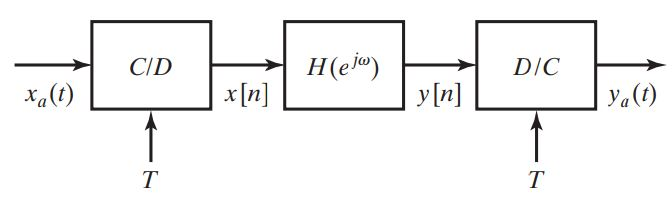

Fig. Basic System for Discrete Filtering of Continuous-Time Signals

In this figure, we illustrate the fundamental system for performing discrete filtering on continuous-time signals. It is assumed that the signal x[n] has been accurately sampled. Then, T represents the appropriate period for sampling the continuous-time signal . As we will discuss later, T has nothing to do with $T_d$  (sampling period of the digital filter)

Here is the general workflow for the design of digital IIR filters:

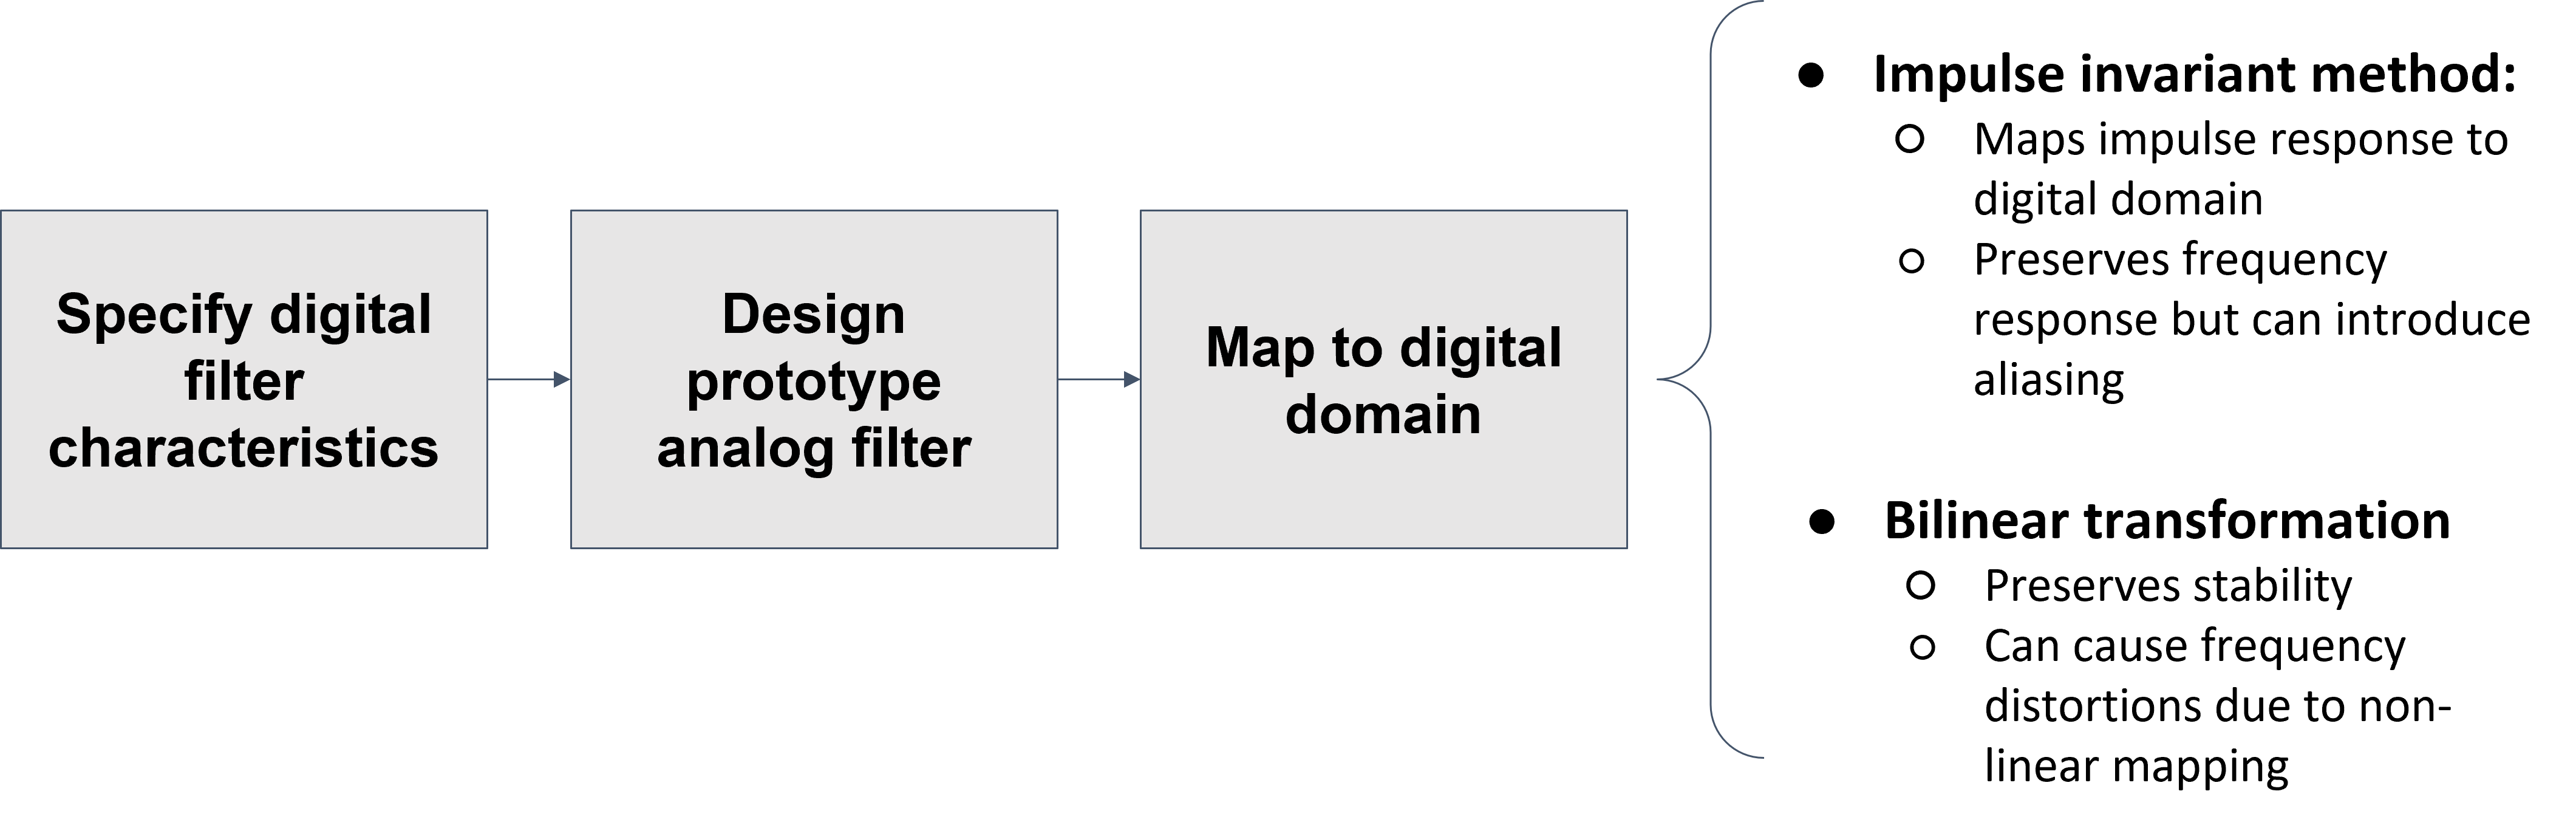

Fig. General workflow for the design of an IIR filter, First, the digital filter characteristics should be defined. Then, a continuous prototype filter is designed. This prototype serves just as a proxy for our digital filter and depends on the mapping method. Finally, the digital filter is obtained by one of the mapping methods to digital domain.

## **What are the basis for the design of an IIR Filter?**

There are multiple methods that allow the IIR filter design from the analog filter design.

An analog filter can be described such as:

$$H_a(s)=\frac{B(s)}{A(s)} =\frac{\sum_{k=0}^M\beta_ks^k}{\sum_{k=0}^N\alpha_ks^k}$$
Also, it is possible to represent it from its impulse response $h(t)$ which is related with $H_a(s)$.

$$H_a(s)=\int_{-\infty}^\infty h(t)e^{-st}dt$$
The relation between input/output of the filter can be described by a differential equation:

$$\sum_{k=0}^N\alpha_k\frac{d^k}{dt^k}y(t)=\sum_{k=0}^M\beta_k\frac{d^k}{dt^k}x(t)$$
Stability of $H(s)$: all the poles are in the left half plane. Then, for the conversion from an analog filter to a digital filter to be consistent, the following properties must be met:

* The axis $j\Omega$ of the plane $s$ must be projected in the unit circle in the $z$ plane. Then, it has to be a direct relation between $s$ and $z$.

* The left half plane $s$ must be mapped inside the unit circle of the $z$ plane. Then, a stable analog filter is going to be a stable discrete filter.

In this course we will study two methods:

* Impulse invariance method

* Bilinear transformation method

## **What is the procedure for the impulse invariance method?**

Design from an impulse response  which is the sampled impulse response of an analog filter:

$$h[n]=h_a(nT_d);\quad n=0,1,2,\dots;\quad T_d=\frac{1}{F_s}$$

**Note: Here $T_d$ has nothing to do with $T$. Actually, we do not need T for our discussion**

Then, given the analog filter $h_a$ with a frequency response $H_a(j\Omega)$, the sampled version with uniform period $T_d$ has a frequency response $\frac{1}{T_d}H_a(j\Omega)$ in multiples of $\Omega_s$.


Finally, the digital filter with impulse response $h[n]$ has a frequency response:

$$H(e^{j\omega})=\frac{1}{T_d}\sum_{k=-\infty}^\infty H_a(j(\Omega-k\Omega_sT_d))|_{\Omega=\frac{\omega}{T_d}}$$
* Impulse invariance response requires an appropriate $T_d$ to avoid aliasing in the frequency response of the analog filter.

* It is possible to design a low-pass filter from this design. However, the design of the high-pass filter is not appropriate from this because it is not possible to avoid the aliasing effect.

* From the impulse frequency sample, the mapping of the plane $S$ and plane $Z$ is given by the relation between the Z-transform of $h[n]$ and the Laplace transform of $h_a(t)$:

$$H(z)|_{z=e^{st}}=\sum_{m=0}^\infty h[n]e^{-sT_dn}=\frac{1}{T_d}\sum_{k=-\infty}^\infty H_a\left(s-j\frac{2\pi k}{T_d}\right)$$
Then, the direct relation between the variables is $z=e^{sT_d}$.

Defining: $s=\sigma + j\Omega$ and $z=re^{j\omega}$ then:

$$z=re^{j\omega}=e^{\sigma T_d}e^{j\Omega T_d}$$
$$z=e^{\sigma T_d};\quad \omega=\Omega T$$
* If $\sigma  < 0$ (left-half plane in $s$) $\rightarrow 0 < r < 1$ (inside unit cirlce in $z$).

* If $\sigma > 0$ (right-half plane in $s$) $\rightarrow r>1$ (outside unit circle in $z$).

* The analog stable system implies a stable discrete system.

* The map of the axis $j\Omega$ inside the unit circle is not a one-to-one corresponding.

* The relation $\omega=\Omega T_d$ implies that the interval $\frac{(2k-1)\pi}{T_d}\leq\Omega\leq \frac{(2k+1)\pi}{T_d}$is projected to $-\pi\leq\omega\leq\pi, \forall k \in Z$.

* This correspondence reflects the sampling and aliasing effect of the method used.

From this transformation, and assuming an analog system represented in partial fractions:

$$H_a(s)=\sum_{k=1}^N\frac{c_k}{s-p_k}$$
$c_k$: partial fractions coefficients, $p_k$: analog filter poles

Then, by Laplace transform:

$$H_a(s)\leftrightarrow h_a(t)=\sum_{k=1}^N c_ke^{p_kt},\space t\geq0$$
And sampling $h_a(t)$ ; $t=nT_d$

$$h[n]=h_a(nT_d)=\sum_{k=1}^Nc_ke^{p_kT_dn},\space t\geq 0$$
Then, the transfer function of the IIR system design is:

$$H(z)=\sum_{n=0}^\infty h[n]z^{-n}=\sum_{n=0}^\infty \left(\sum_{k=1}^Nc_ke^{pkT_dn}\right)z^{-n}$$
$$=\sum_{k=1}^Nc_k\sum_{k=1}^N\left(e^{p_kT_d}z^{-1}\right)^n;\quad \sum_{n=0}^\infty\left(e^{p_kT_d}z^{-1}\right)^n=\frac{1}{1-e^{p_kT_d}z^{-1}}$$
$$H(z)=\sum_{k=1}^N\frac{c_k}{1-e^{p_kT_d}z^{-1}}$$
Which is the transfer function of the discrete filter designed. Finally, the transfer function of the digital filter has poles in:

$$z_k=e^{p_kT_d};\quad k=1,2,\dots,N$$

![figur1](https://github.com/piero-latorre/DSP/blob/main/IX/image_0.png?raw=true)

Figure 1. Periodicity of the frequency response.

![figur2](https://github.com/piero-latorre/DSP/blob/main/IX/image_1.png?raw=true)

Figure 2. Laplace and Z-transforms.

## **What is the procedure for the bilinear transformation method?**

It is not only for designing low-pass but also high-pass filters. Implies a projection on the axis $j\Omega$ to the unit circle with a one to one relation. Then, it avoids aliasing issues. Additionally, all the half plane of $s$ is mapped to the inside of the unit circle (and the right half plane is mapped to the exterior of the unit circle).

From the analog system:

$$H(s)=\frac{b}{s+a}$$
From the trapezoidal rule (Proakis Ch. 8.3), it is possible to express the equivalent digital filter such as:

$$H(z)=\frac{b}{\frac{2}{T}\left(\frac{1-z^{-1}}{1+z^{-1}}\right) + a}$$
Then, it is possible to define:

$$s=\frac{2}{T}\left(\frac{1-z^{-1}}{1+z^{-1}}\right)$$
If $z=re^{j\omega}$ and $s=\delta+j\Omega$

$$s=\frac{2}{T}\frac{z-1}{z+1}=\frac{2}{T}\frac{re^{j\omega}-1}{re^{j\omega}+1}$$
Then,

$$\sigma=\frac{2}{T}\left(\frac{r^2-1}{1+r^2+2r\cos(\omega)}\right)$$
$$\Omega=\frac{2r\sin(\omega)}{1+r^2+2r\cos(\omega)}$$
* $r<1\rightarrow\sigma <0$

* $r>1\rightarrow\sigma >0$

* $r=1\rightarrow\sigma =0$ and $\Omega=\frac{2}{T}\frac{sin(\omega)}{1+cos(\omega)}$

In the same way:

$$\Omega=\frac{2}{T}\left(\tan\left(\frac{\omega}{2}\right)\right)$$
$$\omega=2\arctan \left(\frac{\Omega T}{2}\right)$$
This relation shows that $\Omega$ is mapping to $-\pi\leq\omega\leq\pi$ in a non-linear way.

![fig3](https://github.com/piero-latorre/DSP/blob/main/IX/image_2.png?raw=true)

Figure 3. The projection of the plane  to the plane Z

## **How can we obtain an IIR analog filter?**
From the previous explanation, it can be concluded that the filter design of the infinite impulse response is based on:

* Analog filter design with a desired frequency response.

* Execution of the conversion of $H(s)$ to $H(z)$ preserving the analog filter characteristics.

Butterworth: only pole-based filter with a characteristic magnitude spectrum.

$$|H(j\Omega)|^2=\frac{1}{\left(1+\frac{\Omega}{\Omega_c}\right)^{2N}} = \frac{1}{1+\epsilon^2\left(\frac{\Omega}{\Omega_p}\right)^{2N}}$$
Where:

* $N$: filter order

* $\Omega_c$: cutoff frequency: $|H(j\Omega)|^{2}=-3dB$

* $\Omega_p$: pass frequency: $|H(j\Omega)|^{2}=-\frac{1}{1+e^{2}}dB$

The poles $s_k$ are in a circle with a radius of $\Omega_c$ in equally spaced points:

$$s_k=\Omega_ce^{\frac{j\pi}{2N}(2k+N-1)};\quad k=0,1,\dots,2N-1$$
**Butterworth filter**

$|H(j\Omega)|^{2}$ is monotonous in the pass band and in the stop band. The required $N$ to obtain an attenuation $\delta_2$ in a specific frequency $\Omega_s$ is derived from:

$$|H(j\Omega)|^2=\frac{1}{1+\left(\frac{\Omega_s}{\Omega_c}\right)^{2N}} = \delta_2^2$$
From the previous, it can be concluded that the Butterworth filter is completely characterized by $N$, $\delta_2$ and the ratio $\frac{\Omega_s}{\Omega_c}$.

![fig4](https://github.com/piero-latorre/DSP/blob/main/IX/image_3.png?raw=true)

Figure 4. Pole location on an analog Butterworth filter.

![fig5](https://github.com/piero-latorre/DSP/blob/main/IX/image_4.png?raw=true)

Figure 5. Magnitude spectrum of Butterworth filter with different orders.


Chebyshev filter

In contrast to Butterworth filter and its monotonous behaviour, it is possible to obtain a low-order filter (using less resources, a simple implementation) to distribute the error of the approximation to the desired response on a uniformly way in the pass band and in the stop band. This is possible from a design that generates a constant ripple in that bands instead a monotonous behaviour.

Then:

Chebyshev filter type I: constant ripple in the pass band and monotonicity in the stop band.

Chebyshev filter type II: constant ripple in the stop band and monotonicity in the pass band.

##Example

Design a digital filter that met the following characteristics:

$$0.89125\leq|H(e^{j\omega})|\leq1;\quad 0\leq|\omega|\leq0.2\pi$$
$$|H(e^{j\omega})|\leq0.17783;\quad 0.3\pi\leq|\omega|\leq\pi$$



1.   Use the impulse invariant method and use the Butterworth filter as a prototype.
2.   Use the bilinear method and use the Butterworth filter as a prototype.
3.   Compare the frequecy response of the digital filters obtained for both methods.



##Solution A:


### STEP 1: 
Use the digital characteristics and map to the characteristics of the prototype continuos time filter.
To do so, we need to define $T_d$, and make $\Omega =\frac{\omega }{T_d }$, as $T_d$ will cancel in  further operations, this value does not matter so, conveniently, we select , then .Thus:

$0.89125\leq|H_c(j\Omega)|\leq1;\quad 0\leq|\Omega|\leq0.2\pi$

$|H_c(j\Omega)|\leq0.17783;\quad 0.3\pi\leq|\Omega|\leq\pi$


Which means that the continuous filter has the following characteristics:

$|H_c(j0.2\pi)|\geq0.89125$

$|H_c(j0.3\pi)|\leq0.17783$

which in decibels is:

$20\log_{10}(|H_c(j0.2\pi)|)\geq-1 dB$

$20\log_{10}(|H_c(j0.3\pi)|)\leq-15 dB$

###STEP 2: 
Design the prototype continuous Butterworth filter. This consists of two substeps

2.1: Determine the order of the prototype continuous Butterworth filter (N) and the cuttof frequency ($\Omega {\;}_c$). Let SCIPY do this for us:

In [1]:
import numpy as np
from scipy import signal

N, Omega_c = signal.buttord(0.2*np.pi, 0.3*np.pi, 1, 15, analog=True)
print(N)
print(Omega_c)

6
0.7032050464407111


Remember that these are characteristics of the prototype continuos Butterworth filter.

2.2: Get the coeeficients of the prototype filter

In [2]:
bProtype, aProtype = signal.butter(N, Omega_c, analog=True)
print(bProtype)
print(aProtype)

[0.12091826]
[1.         2.71697566 3.69097837 3.17884322 1.82517898 0.66437558
 0.12091826]


Lets compute its frequency response:

In [3]:
Omega_axis = np.linspace(0.1, np.pi);
_, freq_response_continuos = signal.freqs(bProtype, aProtype, worN=Omega_axis)

Lets plot the frequency response in magnitude, decibels and the phase:

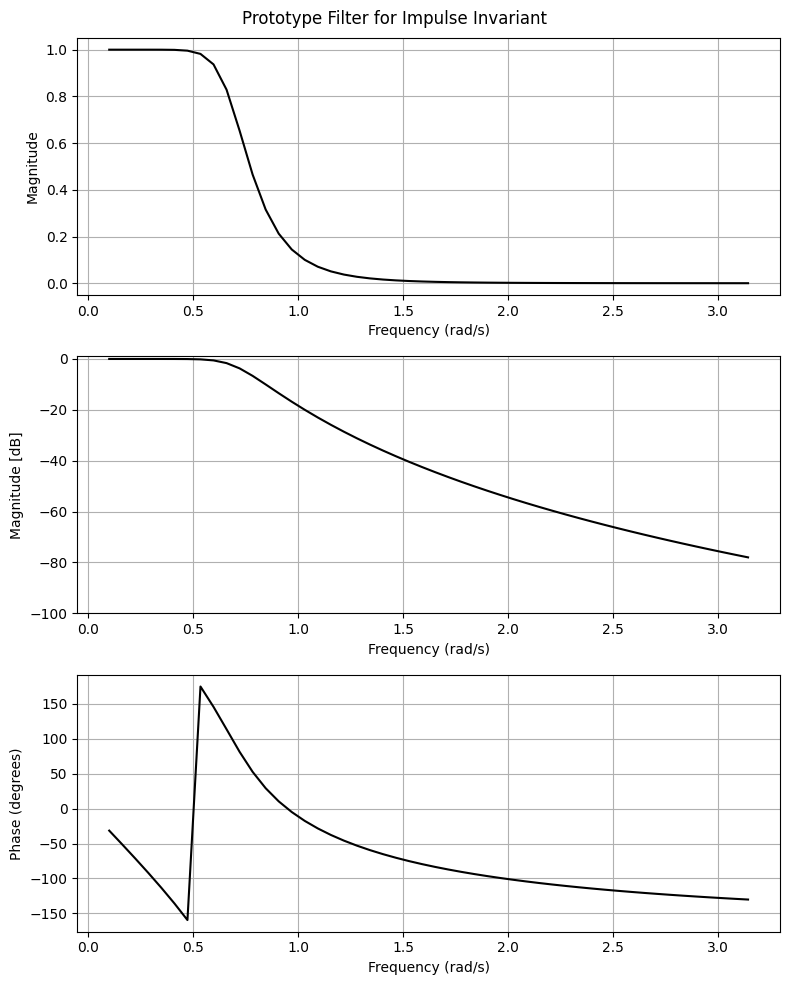

In [4]:
import matplotlib.pyplot as plt

mag = abs(freq_response_continuos);
magdB = 20*np.log10(mag);
phase = np.angle(freq_response_continuos);
phasedeg = phase*180/np.pi;

fig, axs = plt.subplots(3, 1, figsize=(8, 10))
plt.suptitle('Prototype Filter for Impulse Invariant')

axs[0].plot(Omega_axis, mag, 'k')
axs[0].set_xlabel('Frequency (rad/s)')
axs[0].set_ylabel('Magnitude')
axs[0].grid(True)

axs[1].plot(Omega_axis, magdB, 'k')
axs[1].set_xlabel('Frequency (rad/s)')
axs[1].set_ylabel('Magnitude [dB]')
axs[1].set_ylim(-100, 1)
axs[1].grid(True)

axs[2].plot(Omega_axis, phasedeg, 'k')
axs[2].set_xlabel('Frequency (rad/s)')
axs[2].set_ylabel('Phase (degrees)')
axs[2].grid(True)

plt.tight_layout()

###STEP 3:

Get the digital filter.
Now, sadly, `scipy.signal` does not have a impinvar function but here we provided one implementation. We used this to get the digital IIR filter. We need to provide a frequency sampling. This will be 1, because we have chosen $T_d =1$.

In [5]:
def impinvar(b, a, fs):
    # Step 1: Partiual fractions expansion
    r, p, k = signal.residue(b, a)

    # Step 2: replace poles
    p = np.exp(p/fs)

    # Step 3: Find coefficients of transfer function
    bz, az = signal.invresz(r, p, k)

    return bz*1/fs, az

Td=1;
Fs = 1/Td;
[bz_imp, az_imp] = impinvar(bProtype, aProtype, Fs)
print(bz_imp)
print(az_imp)

[-6.43929354e-15-1.58094739e-15j  6.30963826e-04+4.38538095e-15j
  1.01035020e-02-5.77315973e-15j  1.61434135e-02+2.99760217e-15j
  4.10069480e-03-1.11022302e-15j  1.03251861e-04+1.45716772e-16j]
[ 1.        +0.00000000e+00j -3.36351961+0.00000000e+00j
  5.06842016+1.11022302e-16j -4.27586422-2.22044605e-16j
  2.10662057+2.22044605e-16j -0.57064925-2.77555756e-17j
  0.06607428+3.46944695e-18j]


Lets compute the frequency response of this filter:

In [6]:
w_axis = np.linspace(0.1,np.pi);
_, freq_response_digital = signal.freqz(bz_imp, az_imp, w_axis);

Lets plot the frequency response in magnitude, decibels and the phase:

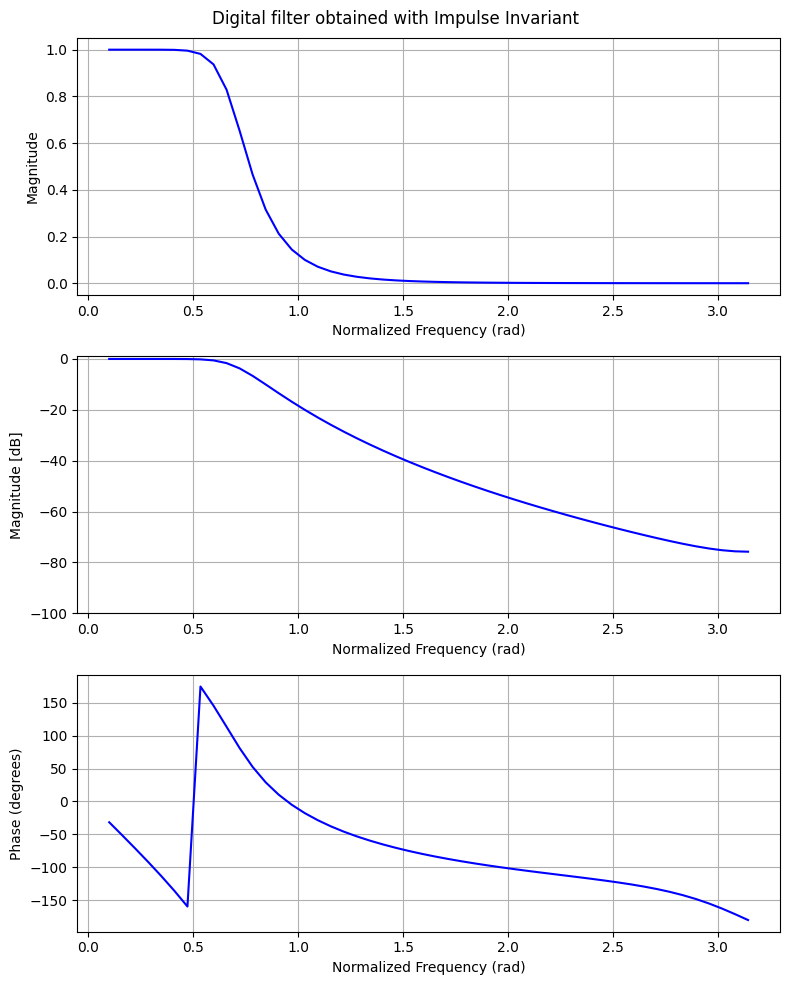

In [7]:
mag_imp = abs(freq_response_digital);
magdB_imp = 20*np.log10(mag_imp);
phase_imp = np.angle(freq_response_digital);
phasedeg_imp = phase_imp*180/np.pi;

fig, axs = plt.subplots(3, 1, figsize=(8, 10))
plt.suptitle('Digital filter obtained with Impulse Invariant')
axs[0].plot(w_axis, mag_imp, 'b')
axs[0].set_xlabel('Normalized Frequency (rad)')
axs[0].set_ylabel('Magnitude')
axs[0].grid(True)

axs[1].plot(w_axis, magdB_imp, 'b')
axs[1].set_xlabel('Normalized Frequency (rad)')
axs[1].set_ylabel('Magnitude [dB]')
axs[1].set_ylim(-100, 1)
axs[1].grid(True)

axs[2].plot(w_axis, phasedeg_imp, 'b')
axs[2].set_xlabel('Normalized Frequency (rad)')
axs[2].set_ylabel('Phase (degrees)')
axs[2].grid(True)

plt.tight_layout()

##Solution B:

###STEP 1: 
Use the digital characteristics and map to the characteristics of the prototype continuos time filter.

We need to map the digital characteristics:

$0.89125\leq|H(e^{j\omega})|\leq1;\quad 0\leq|\omega|\leq0.2\pi$

$|H(e^{j\omega})|\leq0.17783;\quad 0.3\pi\leq|\omega|\leq\pi$

to a continuous one.


To do this for the bilinear method we use the following transformations:

$\Omega=\frac{2}{T_d}\left(\tan\left(\frac{\omega}{2}\right)\right)$

$\omega=2\arctan \left(\frac{\Omega T_d}{2}\right)$

As in the previous question we select $T_d =1$.Thus:

$\Omega=2\tan\left(\frac{\omega}{2}\right)$

$\omega=2\arctan \left(\frac{\Omega}{2}\right)$

Then:

$0.89125\leq|H_c(j\Omega)|\leq1;\quad 0\leq|\Omega|\leq2\tan\left(\frac{0.2\pi}{2}\right)$

$|H_c(j\Omega)|\leq0.17783;\quad 2\tan\left(\frac{0.3\pi}{2}\right)\leq|\Omega|\leq\infty$

Computing the operations:

$0.89125\leq|H_c(j\Omega)|\leq1;\quad 0\leq|\Omega|\leq0.6498$

$|H_c(j\Omega)|\leq0.17783;\quad 1.0191\leq|\Omega|\leq\infty$

Which means that the continuous filter has the following characteristics:

$|H_c(j0.6498)|\geq0.89125$

$|H_c(j1.0191)|\leq0.17783$

which in deccibels is:

$20\log_{10}\left(|H_c(j2\tan(0.1\pi))|\right)\geq-1 dB$

$20\log_{10}\left(|H_c(j2\tan(0.15\pi))|\right)\leq-15 dB$


### STEP 2: 

Design the prototype continuous Butterworth filter.

2.1: Determine the order of the prototype continuous Butterworth filter (N) and the cuttof frequency ($\Omega {\;}_c$). Let `scipy.signal` do this for us:

In [8]:
N, Omega_c = signal.buttord(0.6498, 1.0191, 1, 15, analog=True)
print(N)
print(Omega_c)

6
0.7272467973450362


Remember that these are characteristics of the prototype continuos Butterworth filter.

Note: If you compare with Impulse Invariant Method, we have changed the pass- and stopband frequencies

2.2: Get the coeeficients of the prototype filter

In [9]:
bProtype, aProtype = signal.butter(N, Omega_c, analog=True)
print(bProtype)
print(aProtype)

[0.1479418]
[1.         2.80986585 3.94767306 3.51615997 2.08787653 0.78598246
 0.1479418 ]


Lets compute its frequency response:


In [10]:
Omega_axis = np.linspace(0.1, np.pi);
_, freq_response_continuos = signal.freqs(bProtype, aProtype, worN=Omega_axis)

Lets plot the frequency response in magnitude, decibels and the phase:

Text(0, 0.5, 'Phase (degrees)')

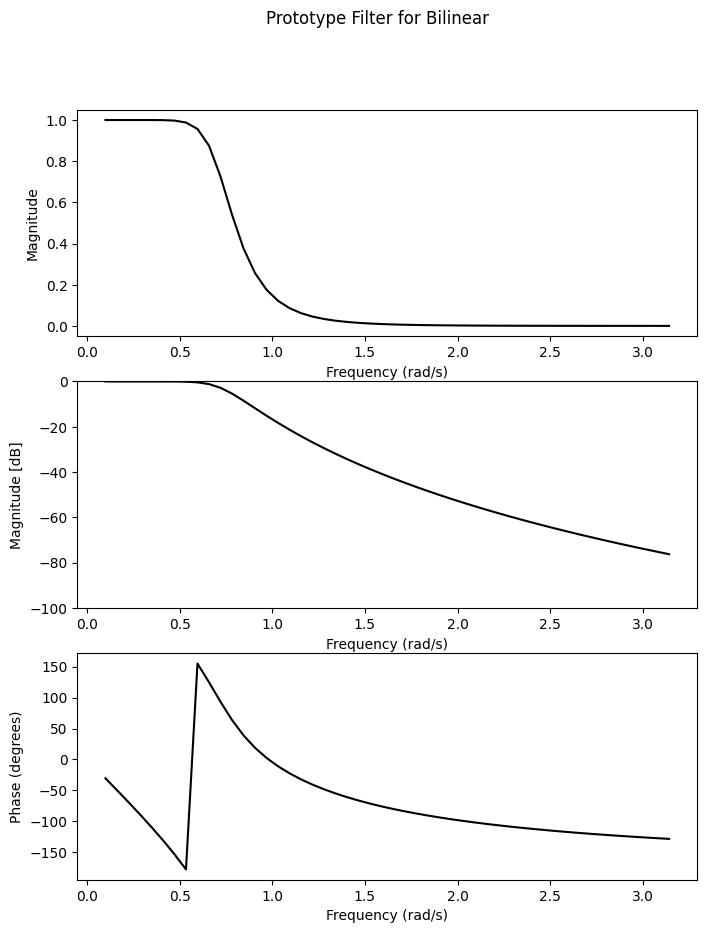

In [11]:
mag = abs(freq_response_continuos);
magdB = 20*np.log10(mag);
phase = np.angle(freq_response_continuos);
phasedeg = phase*180/np.pi;

fig, axs = plt.subplots(3, 1, figsize=(8, 10))
plt.suptitle('Prototype Filter for Bilinear')

axs[0].plot(Omega_axis, mag, 'k')
axs[0].set_xlabel('Frequency (rad/s)')
axs[0].set_ylabel('Magnitude')

axs[1].plot(Omega_axis, magdB, 'k')
axs[1].set_xlabel('Frequency (rad/s)')
axs[1].set_ylabel('Magnitude [dB]')
axs[1].set_ylim(-100, 0)

axs[2].plot(Omega_axis, phasedeg, 'k')
axs[2].set_xlabel('Frequency (rad/s)')
axs[2].set_ylabel('Phase (degrees)')

###STEP 3: 

Get the digital filter.
We do this using  function in MATLAB. We need to provide a frequency sampling. This will be 1, because we have chosen .

In [12]:
Td=1;
Fs = 1/Td;
[bz_bil, az_bil] = signal.bilinear(bProtype, aProtype, Fs)
print(bz_bil)
print(az_bil)

[0.00057953 0.00347718 0.00869294 0.01159059 0.00869294 0.00347718
 0.00057953]
[ 1.         -3.31444923  4.95048374 -4.14368363  2.02779699 -0.54591178
  0.0628538 ]


Lets compute the frequency response of this filter:


In [13]:
w_axis = np.linspace(0.1,np.pi);
_, freq_response_digital = signal.freqz(bz_bil, az_bil, w_axis);

Lets plot the frequency response in magnitude, decibels and the phase:

<ipython-input-14-b9553b9ca0a7>:2: RuntimeWarning: divide by zero encountered in log10
  magdB_bil = 20*np.log10(mag_bil);


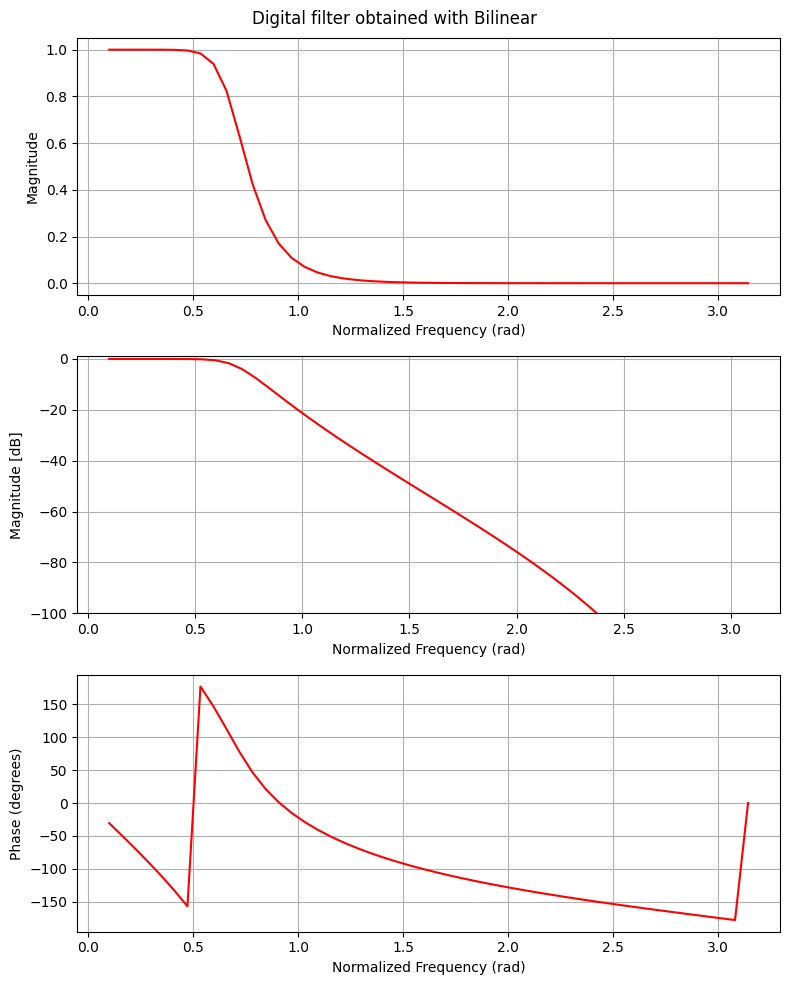

In [14]:
mag_bil = abs(freq_response_digital);
magdB_bil = 20*np.log10(mag_bil);
phase_bil = np.angle(freq_response_digital);
phasedeg_bil = phase_bil*180/np.pi;
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
plt.suptitle('Digital filter obtained with Bilinear')
axs[0].plot(w_axis, mag_bil, 'r')
axs[0].set_xlabel('Normalized Frequency (rad)')
axs[0].set_ylabel('Magnitude')
axs[0].grid(True)

axs[1].plot(w_axis, magdB_bil, 'r')
axs[1].set_xlabel('Normalized Frequency (rad)')
axs[1].set_ylabel('Magnitude [dB]')
axs[1].set_ylim(-100, 1)
axs[1].grid(True)

axs[2].plot(w_axis, phasedeg_bil, 'r')
axs[2].set_xlabel('Normalized Frequency (rad)')
axs[2].set_ylabel('Phase (degrees)')
axs[2].grid(True)

plt.tight_layout()

## Solution C:

Compare the frequecy response of the digital filters obtained for both methods.

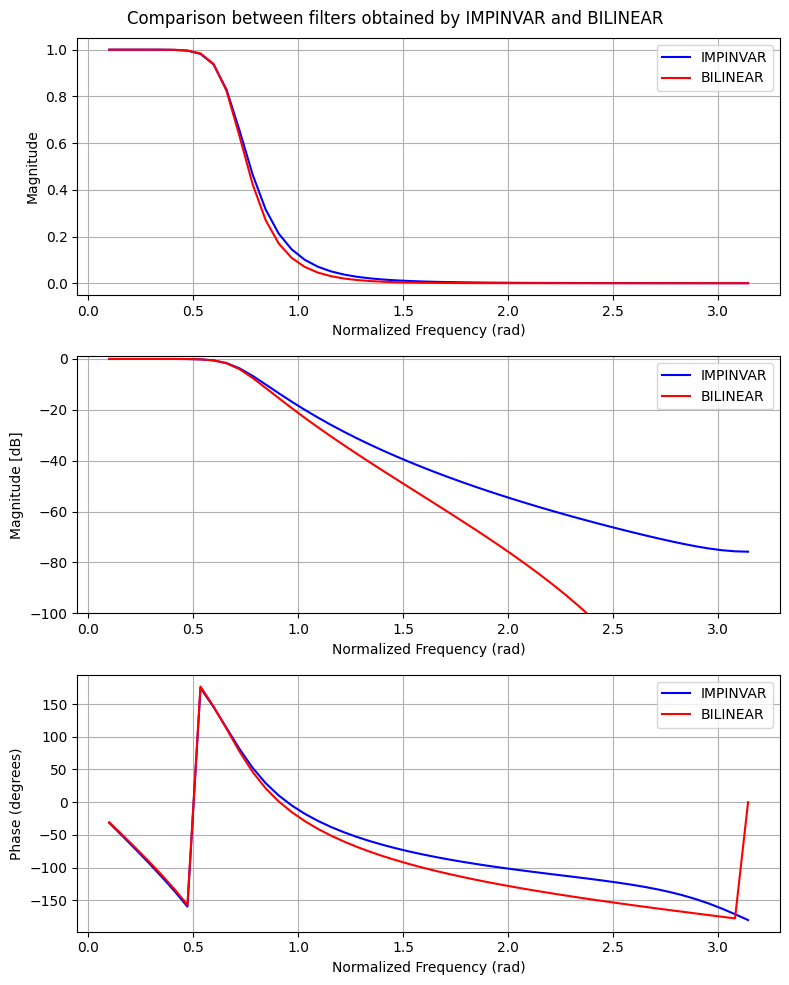

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
plt.suptitle('Comparison between filters obtained by IMPINVAR and BILINEAR')
axs[0].plot(w_axis, mag_imp, 'b', label='IMPINVAR')
axs[0].plot(w_axis, mag_bil, 'r', label='BILINEAR')
axs[0].set_xlabel('Normalized Frequency (rad)')
axs[0].set_ylabel('Magnitude')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(w_axis, magdB_imp, 'b', label='IMPINVAR')
axs[1].plot(w_axis, magdB_bil, 'r', label='BILINEAR')
axs[1].set_xlabel('Normalized Frequency (rad)')
axs[1].set_ylabel('Magnitude [dB]')
axs[1].set_ylim(-100, 1)
axs[1].legend()
axs[1].grid(True)

axs[2].plot(w_axis, phasedeg_imp, 'b', label='IMPINVAR')
axs[2].plot(w_axis, phasedeg_bil, 'r', label='BILINEAR')
axs[2].set_xlabel('Normalized Frequency (rad)')
axs[2].set_ylabel('Phase (degrees)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()